# 3

In [19]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [20]:
# authentication
consumerKey = 'nAfAiljzt8Ntd1oatjYU2uvKc'
consumerSecret = 'JBJahC7nKS4q853V0vodZ8buaYGHwySv6u5XFm52dlownOqTRm'
accessToken = '4880646753-8TzBk1UEjuvXEXR2XL7uJ2ZFMRZnwNrDOioUHI9'
accessTokenSecret = 'CjAas3cB7A9OW7SJFA6SOkyfgv61MyN59W0g47ZSqBL2b'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [38]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: ")) # explicit type casting - 1)implicit 2)explicit - user intupption
tweets = []
tweetText = []
# searching for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm+" -filter:retweets", lang = "en").items(NoOfTerms)

Enter Keyword/Tag to search about: computer vision
Enter how many tweets to search: 10


In [59]:
print( 1 + 3.6) # type casting - implicit

4.6


In [ ]:

# <html> fkfkf </html>
# <html> fkfkf </html>
# <html> fkfkf </html>
# <html> fkfkf </html>
# <html> fkfkf </html>

In [39]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,"this is not computer vision research, it’s a b..."
1,@pfbyjy Technically one could use any vector s...
2,"Join eInfochips, an Arrow company, at #GTC21 f..."
3,MIT researchers have developed a robot that us...
4,"@svpino Hello, I'm a College Student. I'm just..."
5,Top 10 Projects for Beginners in Computer Visi...
6,[Weekend Recap] China AI Deep Dive: Computer V...
7,@replit Enough computer vision software expertise
8,CNN for Computer Vision with Keras and TensorF...
9,We have a @RollsRoyce #Sponsored #PhD #Student...


# 4

In [40]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [41]:
tweet_df

,0,cleaned_data
0,"this is not computer vision research, it’s a b...",this is not computer vision research it s a bu...
1,@pfbyjy Technically one could use any vector s...,Technically one could use any vector space dis...
2,"Join eInfochips, an Arrow company, at #GTC21 f...",Join eInfochips an Arrow company at GTC21 for ...
3,MIT researchers have developed a robot that us...,MIT researchers have developed a robot that us...
4,"@svpino Hello, I'm a College Student. I'm just...",Hello I m a College Student I m just starting ...
5,Top 10 Projects for Beginners in Computer Visi...,Top 10 Projects for Beginners in Computer Visi...
6,[Weekend Recap] China AI Deep Dive: Computer V...,Weekend Recap China AI Deep Dive Computer Visi...
7,@replit Enough computer vision software expertise,Enough computer vision software expertise
8,CNN for Computer Vision with Keras and TensorF...,CNN for Computer Vision with Keras and TensorF...
9,We have a @RollsRoyce #Sponsored #PhD #Student...,We have a Sponsored PhD Studentship in Compute...


In [42]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [43]:
tweet_df # top 5

,0,cleaned_data
0,"this is not computer vision research, it’s a b...",this is not computer vision research it s a bu...
1,@pfbyjy Technically one could use any vector s...,Technically one could use any vector space dis...
2,"Join eInfochips, an Arrow company, at #GTC21 f...",Join eInfochips an Arrow company at GTC for a ...
3,MIT researchers have developed a robot that us...,MIT researchers have developed a robot that us...
4,"@svpino Hello, I'm a College Student. I'm just...",Hello I m a College Student I m just starting ...
5,Top 10 Projects for Beginners in Computer Visi...,Top Projects for Beginners in Computer Vision...
6,[Weekend Recap] China AI Deep Dive: Computer V...,Weekend Recap China AI Deep Dive Computer Visi...
7,@replit Enough computer vision software expertise,Enough computer vision software expertise
8,CNN for Computer Vision with Keras and TensorF...,CNN for Computer Vision with Keras and TensorF...
9,We have a @RollsRoyce #Sponsored #PhD #Student...,We have a Sponsored PhD Studentship in Compute...


In [44]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [45]:
import nltk # natural language tool kit 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\NAMAN
[nltk_data]     AGRAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [47]:
tweet_df['cleaned_data'].values

array(['this is not computer vision research it s a bunch of guy writing judgy thing about their neighbor house into a',
       'technically one could use any vector space distance but cosine similarity dominates most application afai',
       'join einfochips an arrow company at gtc for a webinar on image tuning for computer vision application',
       'mit researcher have developed a robot that us radio wave which can pas through wall to sense hidden object',
       'hello i m a college student i m just starting to learn programming i want to learn data science compute',
       'top project for beginner in computer vision and medical imaging',
       'weekend recap china ai deep dive computer vision report with from',
       'enough computer vision software expertise',
       'cnn for computer vision with kera and tensorflow in python machinelearning ad',
       'we have a sponsored phd studentship in computer vision and robot control for performing on wing rep'],
      dtype=object)

In [48]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [49]:
tweet_df['cleaned_data'].values

array(['computer vision research bunch guy writing judgy thing neighbor house',
       'technically one could use vector space distance cosine similarity dominates application afai',
       'join einfochips arrow company gtc webinar image tuning computer vision application',
       'mit researcher developed robot us radio wave pas wall sense hidden object',
       'hello college student starting learn programming want learn data science compute',
       'top project beginner computer vision medical imaging',
       'weekend recap china ai deep dive computer vision report',
       'enough computer vision software expertise',
       'cnn computer vision kera tensorflow python machinelearning ad',
       'sponsored phd studentship computer vision robot control performing wing rep'],
      dtype=object)

# 5

In [ ]:
# Sentiment analyzer engine = 1)Polarity - [-1 , 1] = -1 bahaut ganda , 1= too good 
# 2) Subjectivity = [0,1] , 0 = objective = facts   ,,    1=subjective = defers from person to person 

In [50]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [51]:
tweet_df['polarity'].value_counts() # frequency of each category in polarity column

Neutral            8
Weakly Positive    1
Weakly Negative    1
Name: polarity, dtype: int64

In [52]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [53]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,70):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


KeyError: 10

In [ ]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

In [54]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [55]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)



In [56]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on computer vision by analyzing 10 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
0.00% people thought it was positive
10.00% people thought it was weakly positive
0.00% people thought it was strongly positive
0.00% people thought it was negative
10.00% people thought it was weakly negative
0.00% people thought it was strongly negative
80.00% people thought it was neutral


In [57]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

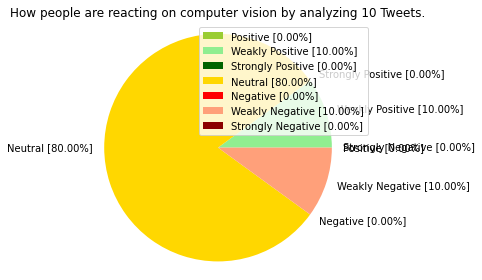

In [58]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()